# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

# DataFrame

In [ ]:
df = pd.read_csv('data/df_out.csv')
print(df.shape)
df.head()

(10000, 20)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

# Data Preparation

## Data Cleaning

### Обработка пропусков

In [ ]:
def print_useful_rows_info(df):

    print('Количество полностью заполненных объектов из всей выборки: ', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки: ', round(len(df.dropna()) / len(df) * 100, 2))

print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки:  9507
Процент полностью заполненных объектов из всей выборки:  95.07


In [ ]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print(f'Процент пропущенных значений:\n{missing_values}')

Процент пропущенных значений:
title_status      1.66
model             1.28
long              0.98
lat               0.98
fuel              0.63
transmission      0.45
year              0.36
posting_date      0.02
description       0.02
image_url         0.02
date              0.02
url               0.00
odometer          0.00
manufacturer      0.00
state             0.00
price             0.00
region_url        0.00
region            0.00
price_category    0.00
id                0.00
dtype: float64


In [ ]:
def missing_columns(df):
    missing_values = ((df.isna().sum() / len(df)) * 100)
    missing_columns = missing_values[missing_values.values > 0].index.tolist()
    return print(f'Признаки, в которых пропущены значения:\n{missing_columns}')

In [ ]:
missing_columns(df)

Признаки, в которых пропущены значения:
['year', 'model', 'fuel', 'title_status', 'transmission', 'image_url', 'description', 'lat', 'long', 'posting_date', 'date']


### Обработка пропусков в posting_date

In [ ]:
print('Количество пропущенных значений в годе выставки на продажу: ', df.posting_date.isna().sum())
df.posting_date.value_counts(dropna=False)

Количество пропущенных значений в годе выставки на продажу:  2


2021-04-19T10:00:54-0400    2
2021-04-13T09:11:02-0500    2
2021-04-11T11:11:05-0400    2
2021-04-08T10:06:02-0500    2
2021-04-29T21:11:29-0400    2
                           ..
2021-04-05T18:13:07-0400    1
2021-04-26T13:32:07-0400    1
2021-05-04T14:01:18-0400    1
2021-04-24T11:40:55-0700    1
2021-04-24T13:50:49-0400    1
Name: posting_date, Length: 9958, dtype: int64

In [ ]:
df[df.posting_date.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
6728,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,nh,NaN,NaN,NaN,low,NaN
9388,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN,medium,NaN


In [ ]:
df = df[df.posting_date.notna()] # так как в этих двух строчках пропущено очень много значений правильным решением будет удалить их

In [ ]:
print_useful_rows_info(df)

missing_columns(df)

Количество полностью заполненных объектов из всей выборки:  9507
Процент полностью заполненных объектов из всей выборки:  95.09
Признаки, в которых пропущены значения:
['year', 'model', 'fuel', 'title_status', 'transmission', 'lat', 'long']


### Обработка пропусков в transmission

In [ ]:
df.transmission.value_counts(dropna=False)

automatic    7700
other        1624
manual        631
NaN            43
Name: transmission, dtype: int64

In [ ]:
df[df.transmission.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
111,7305109580,https://grandrapids.craigslist.org/ctd/d/comst...,grand rapids,https://grandrapids.craigslist.org,12750,2013.0,lexus,es,gas,109382,clean,NaN,https://images.craigslist.org/00n0n_kACT1l7OCN...,2013 Lexus ES 350 4dr Sdn Offered by: Auto...,mi,43.059210,-85.688970,2021-04-11T09:41:58-0400,medium,2021-04-11 13:41:58+00:00
112,7314951119,https://southjersey.craigslist.org/ctd/d/chest...,south jersey,https://southjersey.craigslist.org,18199,2012.0,jeep,wrangler,other,130174,clean,NaN,https://images.craigslist.org/00I0I_gRmuXmqil1...,2012 Jeep Wrangler Unlimited Sport 4WD Off...,nj,40.135190,-74.703570,2021-04-30T14:58:56-0400,medium,2021-04-30 18:58:56+00:00
817,7308021604,https://southjersey.craigslist.org/ctd/d/maple...,south jersey,https://southjersey.craigslist.org,11999,2015.0,honda,civic,gas,79797,clean,NaN,https://images.craigslist.org/00b0b_aCqgRZ7sAx...,2015 Honda Civic EX Offered by: VIP Auto O...,nj,39.938023,-74.971461,2021-04-16T19:46:55-0400,medium,2021-04-16 23:46:55+00:00
931,7314781483,https://nh.craigslist.org/ctd/d/plaistow-2018-...,new hampshire,https://nh.craigslist.org,64990,2018.0,ram,3500,other,8853,clean,NaN,https://images.craigslist.org/00000_iHpXs2BVmN...,2018 RAM Ram Chassis 3500 Short Wheelbase (Dua...,nh,42.834977,-71.107791,2021-04-30T10:15:30-0400,high,2021-04-30 14:15:30+00:00
970,7315044723,https://poconos.craigslist.org/ctd/d/chesterfi...,poconos,https://poconos.craigslist.org,22699,2014.0,jeep,wrangler,gas,110493,clean,NaN,https://images.craigslist.org/00M0M_aFDXWIfug9...,2014 Jeep Wrangler Unlimited Sport 4WD Off...,pa,40.135190,-74.703570,2021-04-30T17:46:04-0400,high,2021-04-30 21:46:04+00:00
1156,7311083008,https://greenville.craigslist.org/ctd/d/greenv...,greenville / upstate,https://greenville.craigslist.org,9998,2013.0,volkswagen,jetta,diesel,96115,clean,NaN,https://images.craigslist.org/00F0F_9oq0KNmZIM...,2013 VOLKSWAGEN JETTA TDI Highline Offered...,sc,34.832550,-82.368350,2021-04-22T17:55:57-0400,medium,2021-04-22 21:55:57+00:00
1349,7303942891,https://wenatchee.craigslist.org/ctd/d/everett...,wenatchee,https://wenatchee.craigslist.org,4995,2005.0,honda,pilot,gas,261591,clean,NaN,https://images.craigslist.org/00S0S_aASnH27HDH...,2005 Honda Pilot EX Offered by: Corn Motor...,wa,47.912956,-122.235725,2021-04-08T16:52:48-0700,low,2021-04-08 23:52:48+00:00
1715,7310344536,https://roanoke.craigslist.org/ctd/d/roanoke-2...,roanoke,https://roanoke.craigslist.org,3995,2007.0,ford,mustang,gas,159342,clean,NaN,https://images.craigslist.org/00J0J_6BuTyEWqNQ...,2007 Ford Mustang V6 Deluxe Coupe Offered ...,va,37.335355,-79.859385,2021-04-21T11:30:46-0400,low,2021-04-21 15:30:46+00:00
1914,7307857568,https://fortmyers.craigslist.org/lee/ctd/d/for...,ft myers / SW florida,https://fortmyers.craigslist.org,17000,2012.0,jeep,grand cherokee,gas,116079,clean,NaN,https://images.craigslist.org/00000_gqxck1dkEu...,2012 Jeep Grand Cherokee Limited Offered b...,fl,26.498960,-81.819380,2021-04-16T14:46:41-0400,medium,2021-04-16 18:46:41+00:00
2023,7314592581,https://pueblo.craigslist.org/ctd/d/pueblo-200...,pueblo,https://pueblo.craigslist.org,8494,2004.0,ford,ranger,gas,156969,clean,NaN,https://images.craigslist.org/01212_6ixSUy4WCq...,2004 Ford Ranger Offered by: Discount Moto...,co,38.298339,-104.616024,2021-04-29T17:30:13-0600,low,2021-04-29 23:30:13+00:00


In [ ]:
df.transmission = df.transmission.fillna('other') # Так как точно не известно, что должно быть на месте пустых значений,
                                                  # пустые значения в колонке 'transmission' лучше всего заполнить значением 'other'
df.transmission.value_counts()

automatic    7700
other        1667
manual        631
Name: transmission, dtype: int64

In [ ]:
print_useful_rows_info(df)

missing_columns(df)

Количество полностью заполненных объектов из всей выборки:  9543
Процент полностью заполненных объектов из всей выборки:  95.45
Признаки, в которых пропущены значения:
['year', 'model', 'fuel', 'title_status', 'lat', 'long']


### Обработка пропусков в lat и long

In [ ]:
df.lat.value_counts(dropna = False)

NaN          96
43.182400    88
33.779214    79
40.468785    73
33.786500    54
             ..
33.640251     1
39.942263     1
34.299800     1
44.472801     1
42.123900     1
Name: lat, Length: 5050, dtype: int64

In [ ]:
df[df.lat.isna()] # Можно заметить, что если не заполнена широта, то не заполнена и долгота.

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012.0,bmw,5 series,gas,62665,clean,automatic,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26T04:28:35-0400,medium,2021-04-26 08:28:35+00:00
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014.0,bmw,7 series,gas,81085,clean,automatic,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01T17:49:09-0400,high,2021-05-01 21:49:09+00:00
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998,2016.0,ford,transit cargo,gas,123825,clean,automatic,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,NaN,NaN,2021-04-18T04:43:46-0400,medium,2021-04-18 08:43:46+00:00
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810,2014.0,mercedes-benz,c-class,gas,124476,clean,automatic,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,NaN,NaN,2021-04-19T12:06:28-0400,medium,2021-04-19 16:06:28+00:00
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900,2008.0,toyota,tundra,gas,96000,clean,automatic,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,NaN,NaN,2021-04-30T12:09:49-0400,medium,2021-04-30 16:09:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,7312710592,https://athensga.craigslist.org/ctd/d/bmw-x5-a...,athens,https://athensga.craigslist.org,14975,2013.0,bmw,x5,gas,97195,clean,automatic,https://images.craigslist.org/00i0i_kU6D0X9br2...,2013 BMW X5 xDrive35i Sport Activity Navigatio...,ga,NaN,NaN,2021-04-26T07:31:40-0400,medium,2021-04-26 11:31:40+00:00
9408,7311736404,https://raleigh.craigslist.org/ctd/d/lexus-nx-...,raleigh / durham / CH,https://raleigh.craigslist.org,28998,2018.0,lexus,nx 300,gas,19863,clean,automatic,https://images.craigslist.org/00Q0Q_j7S3aRy6Sw...,2018 Lexus NX 300 Navigation Sunroof Bluetooth...,nc,NaN,NaN,2021-04-24T00:54:33-0400,high,2021-04-24 04:54:33+00:00
9650,7315596665,https://newjersey.craigslist.org/ctd/d/wow-201...,north jersey,https://newjersey.craigslist.org,16495,2013.0,jeep,grand cherokee,other,90878,clean,automatic,https://images.craigslist.org/00v0v_awwo3NjD7Q...,2013 Jeep Grand Cherokee 4WD 4dr Laredo Automa...,nj,NaN,NaN,2021-05-01T20:53:57-0400,medium,2021-05-02 00:53:57+00:00
9668,7308677951,https://myrtlebeach.craigslist.org/ctd/d/ford-...,myrtle beach,https://myrtlebeach.craigslist.org,33647,2015.0,ford,f-250 super duty,diesel,153524,clean,automatic,https://images.craigslist.org/00f0f_1c0aGXmmCL...,2015 Ford F250 4x4 Truck Diesel Pickup Trucks ...,sc,NaN,NaN,2021-04-18T08:43:25-0400,high,2021-04-18 12:43:25+00:00


In [ ]:
df.long.value_counts(dropna=False)

 NaN          96
-84.112200    88
-84.411811    79
-74.281707    73
-84.445400    54
              ..
-82.527995     1
-97.031100     1
-85.806306     1
-78.625588     1
-79.189500     1
Name: long, Length: 5083, dtype: int64

In [ ]:
(df.long.isna() | df.lat.isna()).sum() # Проверено, что если не заполнена широта, то не заполнена и долгота.

96

In [ ]:
df = df[~(df.long.isna() | df.lat.isna())]  # Оставляем только те записи, которые являются заполненными.
df.shape

(9902, 20)

In [ ]:
print_useful_rows_info(df)

missing_columns(df)

Количество полностью заполненных объектов из всей выборки:  9543
Процент полностью заполненных объектов из всей выборки:  96.37
Признаки, в которых пропущены значения:
['year', 'model', 'fuel', 'title_status']


### Обработка пропусков в годе выпуска автомобиля

In [ ]:
print('Количество пропущенных значений в годе выпуска: ', df.year.isna().sum())
df.year.value_counts(dropna=False)

Количество пропущенных значений в годе выпуска:  34


2017.0    808
2018.0    799
2016.0    733
2013.0    685
2015.0    664
         ... 
1927.0      1
1958.0      1
1941.0      1
1935.0      1
1954.0      1
Name: year, Length: 90, dtype: int64

In [ ]:
df[df.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,gas,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high,2021-04-24 16:41:06+00:00
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high,2021-04-14 16:51:36+00:00
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,gas,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high,2021-04-20 18:46:55+00:00
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,gas,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high,2021-04-28 16:12:14+00:00
1845,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,gas,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high,2021-04-07 21:10:06+00:00


In [ ]:
df = df[df.year.notna()] # Обработал пропуски, удалив записи, в которых год выпуска автомобиля не заполнен.

In [ ]:
print_useful_rows_info(df)

missing_columns(df)

Количество полностью заполненных объектов из всей выборки:  9543
Процент полностью заполненных объектов из всей выборки:  96.71
Признаки, в которых пропущены значения:
['model', 'fuel', 'title_status']


### Обработка пропусков в типе топлива

In [ ]:
df.fuel.value_counts(dropna=False)

gas         8298
other        725
diesel       643
hybrid       104
NaN           54
electric      44
Name: fuel, dtype: int64

In [ ]:
df[df.fuel.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,193242,clean,automatic,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-20T10:40:15-0700,low,2021-04-20 17:40:15+00:00
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,79522,clean,automatic,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-29T15:15:30-0700,high,2021-04-29 22:15:30+00:00
275,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,10679,clean,automatic,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T15:50:19-1000,high,2021-05-01 01:50:19+00:00
471,7316807613,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,13436,2006.0,chevrolet,"silverado 1500 ext cab 143.5"" wb 4wd ls",NaN,172700,clean,automatic,https://images.craigslist.org/00l0l_35tV0gQdD8...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-05-04T10:20:19-0700,medium,2021-05-04 17:20:19+00:00
1009,7314561306,https://cnj.craigslist.org/ctd/d/parlin-2000-c...,central NJ,https://cnj.craigslist.org,5894,2000.0,chevrolet,"s-10 ext cab 123"" wb ls",NaN,78740,clean,automatic,https://images.craigslist.org/00O0O_8vd70bT1rY...,***Call Us for more information at: 732-316-55...,nj,40.468650,-74.296990,2021-04-29T18:20:19-0400,low,2021-04-29 22:20:19+00:00
1279,7310297136,https://westernmass.craigslist.org/ctd/d/johns...,western massachusetts,https://westernmass.craigslist.org,6000,2008.0,other,IC IC,NaN,0,NaN,automatic,https://images.craigslist.org/00404_cBFpBKbfr2...,"2008 *IC* *IC* CE300 - $6,000Call Us Today! 85...",ma,43.008105,-74.352011,2021-04-21T10:11:05-0400,low,2021-04-21 14:11:05+00:00
1318,7310414739,https://nwct.craigslist.org/ctd/d/melville-200...,northwest CT,https://nwct.craigslist.org,11995,2007.0,gmc,c-7500 multiple uses perfect,NaN,50098,clean,automatic,https://images.craigslist.org/00T0T_jvsOAKSGAr...,2007 *GMC* *C-7500 MULTIPLE USES PERFECT* FOR ...,ct,40.681179,-73.430488,2021-04-21T13:18:41-0400,medium,2021-04-21 17:18:41+00:00
1686,7316342709,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,19942,2017.0,ram,"promaster cargo van 1500 low roof 118"" wb",NaN,88836,clean,automatic,https://images.craigslist.org/00707_6ZlIIpYmGf...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T14:40:24-0400,medium,2021-05-03 18:40:24+00:00
1847,7315151536,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29988,2019.0,toyota,sienna le fwd 8-passenger (natl),NaN,18762,clean,automatic,https://images.craigslist.org/00R0R_dO0gtiRwLa...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T16:25:22-1000,high,2021-05-01 02:25:22+00:00


In [ ]:
df.fuel = df.fuel.fillna('other') # Обработал пропуски, заполнив незаполненные значения топлива значением other

In [ ]:
print_useful_rows_info(df)

missing_columns(df)

Количество полностью заполненных объектов из всей выборки:  9584
Процент полностью заполненных объектов из всей выборки:  97.12
Признаки, в которых пропущены значения:
['model', 'title_status']


### Обработка пропусков в модели автомобиля

In [ ]:
df.model.value_counts(dropna = False)

f-150                        148
NaN                          126
silverado 1500               106
1500                         100
camry                         76
                            ... 
sorrento lx v6                 1
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
a3 2.0t premium plus pzev      1
Name: model, Length: 3438, dtype: int64

In [ ]:
df[df.model.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low,2021-05-04 20:11:15+00:00
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low,2021-05-04 01:33:40+00:00
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low,2021-04-08 13:10:07+00:00
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium,2021-05-01 14:05:17+00:00
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium,2021-05-03 01:06:09+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007.0,toyota,NaN,gas,85285,clean,automatic,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low,2021-04-29 15:50:54+00:00
9616,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012.0,ram,NaN,gas,73082,clean,automatic,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium,2021-04-09 20:24:23+00:00
9670,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005.0,gmc,NaN,gas,52536,clean,automatic,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low,2021-04-20 08:48:30+00:00
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,NaN,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00


In [ ]:
df.model = df.model.fillna('other') # Заполняем значения значением 'other'

In [ ]:
print_useful_rows_info(df)

missing_columns(df)

Количество полностью заполненных объектов из всей выборки:  9709
Процент полностью заполненных объектов из всей выборки:  98.39
Признаки, в которых пропущены значения:
['title_status']


### Обработка пропусков в статусе

In [ ]:
df.title_status.value_counts(dropna = False)

clean         9397
rebuilt        168
NaN            159
salvage         91
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [ ]:
df[df.title_status.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,gas,59242,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low,2021-05-04 01:03:32+00:00
187,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013.0,ram,1500 tradesman quad cab,gas,145499,NaN,automatic,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium,2021-04-27 22:03:47+00:00
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,gas,3700,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high,2021-05-01 10:35:56+00:00
286,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003.0,chevrolet,avalanche 1500,gas,268691,NaN,automatic,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low,2021-04-14 16:03:01+00:00
312,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017.0,ford,mustang,gas,66049,NaN,automatic,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium,2021-04-16 11:06:29+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013.0,honda,odyssey,gas,203112,NaN,automatic,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low,2021-04-04 17:12:27+00:00
9805,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,other,95674,NaN,other,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low,2021-04-28 18:25:32+00:00
9840,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014.0,lexus,rx 350,gas,70800,NaN,automatic,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium,2021-04-30 20:00:48+00:00
9856,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006.0,lexus,gx 470,gas,242000,NaN,automatic,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium,2021-04-20 12:01:49+00:00


In [ ]:
df.title_status = df.title_status.fillna(df.title_status.mode()[0])
# Значения в статусе заполнил самым популярным значением

In [ ]:
print_useful_rows_info(df)

missing_columns(df)

Количество полностью заполненных объектов из всей выборки:  9868
Процент полностью заполненных объектов из всей выборки:  100.0
Признаки, в которых пропущены значения:
[]


### Преобразование типов данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9868 non-null   int64  
 1   url             9868 non-null   object 
 2   region          9868 non-null   object 
 3   region_url      9868 non-null   object 
 4   price           9868 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9868 non-null   object 
 7   model           9868 non-null   object 
 8   fuel            9868 non-null   object 
 9   odometer        9868 non-null   int64  
 10  title_status    9868 non-null   object 
 11  transmission    9868 non-null   object 
 12  image_url       9868 non-null   object 
 13  description     9868 non-null   object 
 14  state           9868 non-null   object 
 15  lat             9868 non-null   float64
 16  long            9868 non-null   float64
 17  posting_date    9868 non-null   o

#### Преобразование числовых типов данных

In [ ]:
df.id.min(), df.id.max() # Числа большие, поэтому не надо менять тип данных

(7301585523, 7317090004)

In [ ]:
df.year.min(), df.year.max() # Так как значения года выпуска оппадают в диапазон 1915-2022, можно исользовать тип данных UInt16

(1915.0, 2022.0)

In [ ]:
df.year = df.year.astype('uint16') # UInt16 принимает значения от 0 до 65535 и весит меньше

In [ ]:
df.price.min(), df.price.max()

(500, 12345678)

In [ ]:
df.price = df.price.astype('uint32') # uint32 принимает значения от 0 по 4294967295

In [ ]:
df.odometer.min(), df.odometer.max()

(0, 283466)

In [ ]:
df.odometer = df.odometer.astype('uint32')

In [ ]:
df.lat.min(), df.lat.max()

(-67.144243, 64.9475)

In [ ]:
df.lat == df.lat.astype('float32') # Числа меняются, если менять тип данных на float32, поэтому оставим float64

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: lat, Length: 9868, dtype: bool

In [ ]:
df.long == df.long.astype('float32') # Числа меняются, если менять тип данных на float32, поэтому оставим float64

0        True
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: long, Length: 9868, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9868 non-null   int64  
 1   url             9868 non-null   object 
 2   region          9868 non-null   object 
 3   region_url      9868 non-null   object 
 4   price           9868 non-null   uint32 
 5   year            9868 non-null   uint16 
 6   manufacturer    9868 non-null   object 
 7   model           9868 non-null   object 
 8   fuel            9868 non-null   object 
 9   odometer        9868 non-null   uint32 
 10  title_status    9868 non-null   object 
 11  transmission    9868 non-null   object 
 12  image_url       9868 non-null   object 
 13  description     9868 non-null   object 
 14  state           9868 non-null   object 
 15  lat             9868 non-null   float64
 16  long            9868 non-null   float64
 17  posting_date    9868 non-null   o

#### Преобразование категориальных переменных.

Категориальным переменным можно задавать специальный тип данных category.

In [ ]:
for elem in ['fuel', 'region', 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'state', 'price_category']:
    df[elem] = df[elem].astype('category')

#### Преобразование Даты

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9868 non-null   int64              
 1   url             9868 non-null   object             
 2   region          9868 non-null   category           
 3   region_url      9868 non-null   object             
 4   price           9868 non-null   uint32             
 5   year            9868 non-null   uint16             
 6   manufacturer    9868 non-null   category           
 7   model           9868 non-null   category           
 8   fuel            9868 non-null   category           
 9   odometer        9868 non-null   uint32             
 10  title_status    9868 non-null   category           
 11  transmission    9868 non-null   category           
 12  image_url       9868 non-null   object             
 13  description     9868 non-null   o

### Обработка Аномалий

#### Поиск аномалий будет производится методом интерквартильного размаха.

In [ ]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

#### Аномалии в price

In [ ]:
df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

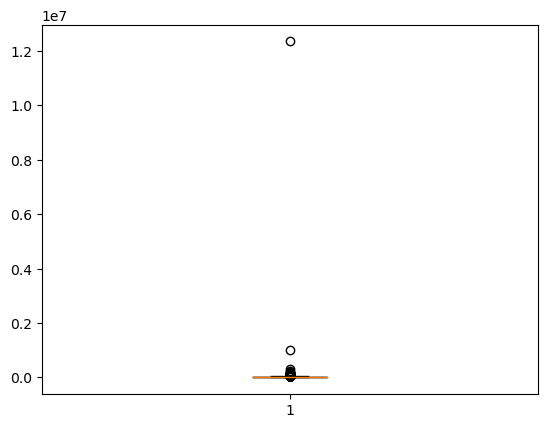

In [ ]:
plt.boxplot(df.price)
plt.show()

In [ ]:
boundaries = calculate_outliers(df.price)
print(boundaries)
((df.price < boundaries[0]) | (df.price > boundaries[1])).sum()

(-22485.0, 58275.0)


207

In [ ]:
is_outlier = ((df.price < boundaries[0]) | (df.price > boundaries[1]))
df[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high,2021-04-25 15:10:43+00:00
33,7304521734,https://kpr.craigslist.org/ctd/d/pasco-2019-fo...,kennewick-pasco-richland,https://kpr.craigslist.org,79999,2019,ford,f450 deisel power stroke,diesel,41759,clean,automatic,https://images.craigslist.org/00D0D_ctOGGthFxQ...,2019 Ford F450 Lariat FX4 Dually 4x4 **Clean C...,wa,46.234838,-119.128015,2021-04-09T19:46:04-0700,high,2021-04-10 02:46:04+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high,2021-04-29 17:49:29+00:00
96,7311450619,https://wenatchee.craigslist.org/ctd/d/kittita...,wenatchee,https://wenatchee.craigslist.org,58995,2020,jeep,wrangler,gas,17799,clean,automatic,https://images.craigslist.org/00a0a_chVstv8e4Z...,ＷＩＮＤＹ ＣＨＥＶＲＯＬＥＴ ⭐ No Payments For 90 Days* ⭐...,wa,46.999600,-120.516300,2021-04-23T10:43:27-0700,high,2021-04-23 17:43:27+00:00
144,7305640478,https://siouxfalls.craigslist.org/ctd/d/gilber...,sioux falls / SE SD,https://siouxfalls.craigslist.org,59900,2014,ford,f550 xl,diesel,156000,clean,automatic,https://images.craigslist.org/00x0x_httQ0BwNkq...,**FOR SALE** 2014 Ford F550 Super Duty 45' Al...,sd,42.117274,-88.436783,2021-04-12T10:34:12-0500,high,2021-04-12 15:34:12+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017,rover,other,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00
9955,7315493686,https://palmsprings.craigslist.org/ctd/d/fonta...,palm springs,https://palmsprings.craigslist.org,68995,2016,ram,2500,diesel,61130,clean,automatic,https://images.craigslist.org/00p0p_5PdfAkd0AM...,2016 Ram 2500 Laramie Offered by: R&B Auto...,ca,34.107220,-117.455310,2021-05-01T13:40:57-0700,high,2021-05-01 20:40:57+00:00
9971,7314385254,https://spokane.craigslist.org/ctd/d/puyallup-...,spokane / coeur d'alene,https://spokane.craigslist.org,86977,2017,ford,f450 super duty crew cab,diesel,16806,clean,automatic,https://images.craigslist.org/00H0H_5P0NdUIgHi...,2017 *** Ford F450 Super Duty Crew Cab Platinu...,id,47.197304,-122.291776,2021-04-29T10:03:19-0700,high,2021-04-29 17:03:19+00:00
9978,7307184389,https://holland.craigslist.org/ctd/d/otsego-20...,holland,https://holland.craigslist.org,61022,2020,gmc,sierra 1500,gas,5894,clean,automatic,https://images.craigslist.org/00i0i_64FIhCkyTb...,"2020 GMC Sierra 1500 AT4 -- $61,022 ☎ Call ...",mi,42.448987,-85.661948,2021-04-15T11:05:47-0400,high,2021-04-15 15:05:47+00:00


Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалим все аномальные значения.

In [ ]:
df = df[~is_outlier]

In [ ]:
df.price.describe()

count     9661.000000
mean     18038.316220
std      12525.953241
min        500.000000
25%       7500.000000
50%      15000.000000
75%      26994.000000
max      57999.000000
Name: price, dtype: float64

#### Аномалии в odometer

In [ ]:
df.odometer.describe()

count      9661.000000
mean      94843.908084
std       62931.680287
min           0.000000
25%       40397.000000
50%       90928.000000
75%      138400.000000
max      283466.000000
Name: odometer, dtype: float64

In [ ]:
boundaries = calculate_outliers(df.odometer)
((df.odometer < boundaries[0]) | (df.odometer > boundaries[1])).sum()

0

#### Аномалии в year

In [ ]:
df.year.describe()

count    9661.000000
mean     2010.815754
std         9.661979
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

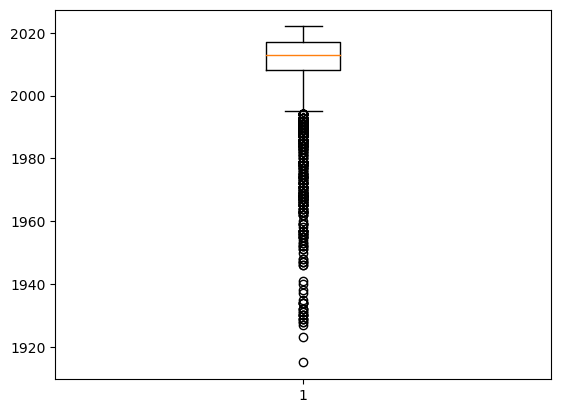

In [ ]:
plt.boxplot(df.year)
plt.show()

In [ ]:
boundaries = calculate_outliers(df.year)
is_outlier = ((df.year < boundaries[0]) | (df.year > boundaries[1]))
print(boundaries)
print(is_outlier.sum())

(1994.5, 2030.5)
386


In [ ]:
df[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994,ford,e-series van universal by glaval designer luxu...,gas,156925,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,"Priced to Sell: $14,9951994 Ford E-Series Van ...",wa,45.391373,-122.613533,2021-05-04T20:22:11-0700,medium,2021-05-05 03:22:11+00:00
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990,other,Diahatsu,gas,30000,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.564400,-74.430400,2021-04-20T18:30:18-0400,low,2021-04-20 22:30:18+00:00
106,7314527175,https://rapidcity.craigslist.org/ctd/d/sherman...,rapid city / west SD,https://rapidcity.craigslist.org,43500,1968,chevrolet,camaro,gas,43320,clean,manual,https://images.craigslist.org/00h0h_2N66LMJBAI...,1968 Chevrolet Camaro Convertible. VIN:124678N...,sd,33.637200,-96.618400,2021-04-29T15:11:01-0600,high,2021-04-29 21:11:01+00:00
145,7316938454,https://duluth.craigslist.org/cto/d/calumet-83...,duluth / superior,https://duluth.craigslist.org,4000,1983,chevrolet,c10 short box,gas,0,clean,automatic,https://images.craigslist.org/00P0P_6I2TfYDHbN...,Arizona project started. new 350 4 bolt main ...,mn,47.394400,-93.246200,2021-05-04T15:55:58-0500,low,2021-05-04 20:55:58+00:00
146,7315501888,https://boise.craigslist.org/cto/d/boise-1994-...,boise,https://boise.craigslist.org,1500,1994,ford,f150,gas,233659,clean,manual,https://images.craigslist.org/00K0K_cSEkfT8I3k...,"I’m at selling my 1994 Ford F-150 233,000 mile...",id,43.632200,-116.205200,2021-05-01T14:57:16-0600,low,2021-05-01 20:57:16+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,7313487583,https://springfield.craigslist.org/cto/d/mount...,springfield,https://springfield.craigslist.org,3500,1974,jeep,cj5,gas,10000,clean,manual,https://images.craigslist.org/00G0G_cdxzaTaVqa...,1974 Jeep cj5 304 v8 4speed manual trans Da...,mo,36.331200,-92.375300,2021-04-27T14:30:28-0500,low,2021-04-27 19:30:28+00:00
9921,7311566144,https://chico.craigslist.org/cto/d/chico-1994-...,chico,https://chico.craigslist.org,16000,1994,ford,f250,gas,32500,clean,automatic,https://images.craigslist.org/01010_343KkgTaHo...,"Up for sale is this 32,000 original mile Ford ...",ca,39.745800,-121.844400,2021-04-23T13:51:20-0700,medium,2021-04-23 20:51:20+00:00
9944,7313676859,https://reno.craigslist.org/ctd/d/sherman-1984...,reno / tahoe,https://reno.craigslist.org,26500,1984,chevrolet,silverado,gas,38751,clean,automatic,https://images.craigslist.org/00r0r_czXfi4UeJF...,"1984 Chevrolet C10 Silverado, short wheelbase ...",ca,33.637200,-96.618400,2021-04-27T19:44:27-0700,high,2021-04-28 02:44:27+00:00
9972,7316458200,https://portland.craigslist.org/mlt/cto/d/port...,portland,https://portland.craigslist.org,18500,1972,chevrolet,other,gas,75000,clean,automatic,https://images.craigslist.org/00x0x_7FqS8iHJst...,1972 classic Chevrolet pick up custom deluxe ...,or,45.494960,-122.666988,2021-05-03T14:58:34-0700,medium,2021-05-03 21:58:34+00:00


In [ ]:
df[is_outlier].price_category.value_counts()

low       181
medium    135
high       70
Name: price_category, dtype: int64

Так как выбросы в годе выпуска находятся среди минимальных значений, заполним значения, которые являются выбросами, значением нижней границы.

In [ ]:
df.loc[is_outlier, 'year'] = int(boundaries[0])

In [ ]:
df.year.describe()

count    9661.000000
mean     2011.557189
std         6.508170
min      1994.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

# Feature Engineering

## Узнаем количество уникальных значений категориальных переменных.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9661 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9661 non-null   int64              
 1   url             9661 non-null   object             
 2   region          9661 non-null   category           
 3   region_url      9661 non-null   object             
 4   price           9661 non-null   uint32             
 5   year            9661 non-null   uint16             
 6   manufacturer    9661 non-null   category           
 7   model           9661 non-null   category           
 8   fuel            9661 non-null   category           
 9   odometer        9661 non-null   uint32             
 10  title_status    9661 non-null   category           
 11  transmission    9661 non-null   category           
 12  image_url       9661 non-null   object             
 13  description     9661 non-null   o

In [ ]:
categs = ['region', 'manufacturer', 'model', 'fuel', 'title_status',
          'transmission', 'state']

for cat in categs:
    print(f'Уникальных значений в категории {cat}:')
    print(df[cat].nunique())

Уникальных значений в категории region:
393
Уникальных значений в категории manufacturer:
40
Уникальных значений в категории model:
3358
Уникальных значений в категории fuel:
5
Уникальных значений в категории title_status:
6
Уникальных значений в категории transmission:
3
Уникальных значений в категории state:
51


## Построение признаков из строк

Количество уникальных значений модели велико.

Попробуем их сократить, оставив только первое слово в наименовании модели и положим их в новый признак.

In [ ]:
df['short_model'] = df['model'].apply(lambda x: x.split()[0])

In [ ]:
print(df['short_model'].nunique())
df['short_model']

949


0           2500
1       explorer
2           golf
3           rav4
4         altima
          ...   
9995        rav4
9996    wrangler
9997          a3
9998     cayenne
9999        1500
Name: short_model, Length: 9661, dtype: object

Названия моделей получилось сократить до 949 штук.

## Преобразование категориальных переменных

In [ ]:
categs = ['region', 'manufacturer', 'short_model', 'fuel', 'title_status',
          'transmission', 'state']

data = df[categs]
data

,region,manufacturer,short_model,fuel,title_status,transmission,state
0,chattanooga,ram,2500,diesel,clean,other,tn
1,north jersey,ford,explorer,other,clean,automatic,nj
2,reno / tahoe,volkswagen,golf,gas,clean,other,ca
3,fayetteville,toyota,rav4,gas,clean,automatic,nc
4,new york city,nissan,altima,gas,clean,automatic,ny
...,...,...,...,...,...,...,...
9995,chautauqua,toyota,rav4,gas,clean,automatic,ny
9996,binghamton,jeep,wrangler,gas,clean,other,ny
9997,salem,audi,a3,gas,clean,automatic,or
9998,madison,porsche,cayenne,hybrid,clean,automatic,wi


In [ ]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(data)
ohe_data = ohe.transform(data)
ohe_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
ohe.get_feature_names_out()

array(['region_SF bay area', 'region_abilene', 'region_akron / canton',
       ..., 'state_wi', 'state_wv', 'state_wy'], dtype=object)

In [ ]:
df[ohe.get_feature_names_out()] = ohe_data

In [ ]:
ohe.inverse_transform(ohe_data)

array([['chattanooga', 'ram', '2500', ..., 'clean', 'other', 'tn'],
       ['north jersey', 'ford', 'explorer', ..., 'clean', 'automatic',
        'nj'],
       ['reno / tahoe', 'volkswagen', 'golf', ..., 'clean', 'other',
        'ca'],
       ...,
       ['salem', 'audi', 'a3', ..., 'clean', 'automatic', 'or'],
       ['madison', 'porsche', 'cayenne', ..., 'clean', 'automatic', 'wi'],
       ['norfolk / hampton roads', 'ram', '1500', ..., 'clean', 'other',
        'va']], dtype=object)

## Стандартизация данных

In [ ]:
variables = ['year', 'lat', 'long', 'odometer']
data = df[variables]
data

,year,lat,long,odometer
0,2020,35.060000,-85.250000,27442
1,2016,40.821805,-74.061962,60023
2,2017,33.779214,-84.411811,14048
3,2013,35.715954,-78.655304,117291
4,2021,40.654800,-73.609700,8000
...,...,...,...,...
9995,2002,42.123900,-79.189500,150000
9996,2008,43.216990,-77.755610,113573
9997,2011,44.925908,-122.982753,150184
9998,2015,43.029559,-89.397796,61943


In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(data)
std_scaler_var = std_scaler.transform(data)
print(std_scaler_var.shape)
std_scaler_var

(9661, 4)


array([[ 1.2973306 , -0.61847986,  0.48571905, -1.07108846],
       [ 0.68268671,  0.38814468,  1.11182909, -0.5533415 ],
       [ 0.83634768, -0.84224145,  0.53262616, -1.28393346],
       ...,
       [-0.08561816,  1.10515797, -1.62589835,  0.87941329],
       [ 0.52902573,  0.77385356,  0.25359821, -0.52283064],
       [ 0.83634768, -0.33720247,  0.98658299, -0.93634808]])

In [ ]:
variables_std = list(map(lambda x: x + '_std', variables))
variables_std

['year_std', 'lat_std', 'long_std', 'odometer_std']

In [ ]:
df[variables_std] = std_scaler_var
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,year_std,lat_std,long_std,odometer_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,0.0,0.0,1.297331,-0.618480,0.485719,-1.071088
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.682687,0.388145,1.111829,-0.553341
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.836348,-0.842241,0.532626,-1.283933
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.221704,-0.503880,0.854774,0.356708
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.450992,0.358968,1.137139,-1.380043


In [ ]:
variables = df[['year', 'lat', 'long', 'odometer', 'year_std', 'lat_std', 'long_std', 'odometer_std']]
variables

,year,lat,long,odometer,year_std,lat_std,long_std,odometer_std
0,2020,35.060000,-85.250000,27442,1.297331,-0.618480,0.485719,-1.071088
1,2016,40.821805,-74.061962,60023,0.682687,0.388145,1.111829,-0.553341
2,2017,33.779214,-84.411811,14048,0.836348,-0.842241,0.532626,-1.283933
3,2013,35.715954,-78.655304,117291,0.221704,-0.503880,0.854774,0.356708
4,2021,40.654800,-73.609700,8000,1.450992,0.358968,1.137139,-1.380043
...,...,...,...,...,...,...,...,...
9995,2002,42.123900,-79.189500,150000,-1.468567,0.615629,0.824879,0.876489
9996,2008,43.216990,-77.755610,113573,-0.546601,0.806599,0.905123,0.297625
9997,2011,44.925908,-122.982753,150184,-0.085618,1.105158,-1.625898,0.879413
9998,2015,43.029559,-89.397796,61943,0.529026,0.773854,0.253598,-0.522831


Проверим, что нормализация признаков сохранила свойства исходных признаков.

In [ ]:
variables.corr()

,year,lat,long,odometer,year_std,lat_std,long_std,odometer_std
year,1.000000,-0.030915,0.016808,-0.494981,1.000000,-0.030915,0.016808,-0.494981
lat,-0.030915,1.000000,-0.134123,0.024519,-0.030915,1.000000,-0.134123,0.024519
long,0.016808,-0.134123,1.000000,-0.001341,0.016808,-0.134123,1.000000,-0.001341
odometer,-0.494981,0.024519,-0.001341,1.000000,-0.494981,0.024519,-0.001341,1.000000
year_std,1.000000,-0.030915,0.016808,-0.494981,1.000000,-0.030915,0.016808,-0.494981
lat_std,-0.030915,1.000000,-0.134123,0.024519,-0.030915,1.000000,-0.134123,0.024519
long_std,0.016808,-0.134123,1.000000,-0.001341,0.016808,-0.134123,1.000000,-0.001341
odometer_std,-0.494981,0.024519,-0.001341,1.000000,-0.494981,0.024519,-0.001341,1.000000


## Признаки на основе дат

In [ ]:
df['month'] = df['date'].dt.month
df['month']

0       4
1       5
2       4
3       4
4       5
       ..
9995    4
9996    5
9997    4
9998    4
9999    4
Name: month, Length: 9661, dtype: int64

In [ ]:
df['dayofweek'] = df['date'].dt.weekday.apply(lambda x: x+1)
df['dayofweek']

0       6
1       1
2       3
3       6
4       1
       ..
9995    6
9996    1
9997    4
9998    3
9999    6
Name: dayofweek, Length: 9661, dtype: int64

In [ ]:
df['dayofweek'] = df['date'].dt.weekday.apply(lambda x: x+1)
df['dayofweek']

0       6
1       1
2       3
3       6
4       1
       ..
9995    6
9996    1
9997    4
9998    3
9999    6
Name: dayofweek, Length: 9661, dtype: int64

In [ ]:
df['diff_years'] = (df['date'].dt.year) - df['year']
df['diff_years']

0        1
1        5
2        4
3        8
4        0
        ..
9995    19
9996    13
9997    10
9998     6
9999     4
Name: diff_years, Length: 9661, dtype: int64

In [ ]:
new_features = df[['month', 'dayofweek', 'diff_years']]
new_features

,month,dayofweek,diff_years
0,4,6,1
1,5,1,5
2,4,3,4
3,4,6,8
4,5,1,0
...,...,...,...
9995,4,6,19
9996,5,1,13
9997,4,4,10
9998,4,3,6


In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(new_features)
new_features_tr = std_scaler.transform(new_features)
new_features_tr.shape

(9661, 3)

Проверим, что нормализация признаков сохранила свойства исходных признаков.

In [ ]:
df[(list(map(lambda x: x+'_std', list(new_features))))] = new_features_tr
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,year_std,lat_std,long_std,odometer_std,month,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,1.297331,-0.618480,0.485719,-1.071088,4,6,1,-0.615598,1.120793,-1.297331
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.682687,0.388145,1.111829,-0.553341,5,1,5,1.624437,-1.375284,-0.682687
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.836348,-0.842241,0.532626,-1.283933,4,3,4,-0.615598,-0.376853,-0.836348
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.221704,-0.503880,0.854774,0.356708,4,6,8,-0.615598,1.120793,-0.221704
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,1.450992,0.358968,1.137139,-1.380043,5,1,0,1.624437,-1.375284,-1.450992


In [ ]:
dates = df[['month', 'dayofweek', 'diff_years', 'month_std', 'dayofweek_std', 'diff_years_std']]
dates.corr()

,month,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std
month,1.000000,-0.067278,0.079820,1.000000,-0.067278,0.079820
dayofweek,-0.067278,1.000000,-0.008976,-0.067278,1.000000,-0.008976
diff_years,0.079820,-0.008976,1.000000,0.079820,-0.008976,1.000000
month_std,1.000000,-0.067278,0.079820,1.000000,-0.067278,0.079820
dayofweek_std,-0.067278,1.000000,-0.008976,-0.067278,1.000000,-0.008976
diff_years_std,0.079820,-0.008976,1.000000,0.079820,-0.008976,1.000000


## Удаление лишних колонок и подготовка нового Датасета

In [ ]:
cols_to_drop = ['id', 'url', 'region', 'region_url', 'price', 'odometer', 'title_status',
                'image_url', 'description', 'fuel', 'transmission', 'manufacturer',
                'year', 'state', 'lat', 'month', 'dayofweek', 'diff_years', 'model',
                'long', 'posting_date', 'date', 'short_model']

df_prepared = df.drop(cols_to_drop, axis=1)

df_prepared.shape

(9661, 1455)

In [ ]:
df_prepared.to_csv('data/vehicles_dataset_prepared.csv')

# Modeling

In [ ]:
df_prepared.head()

,price_category,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,...,state_wi,state_wv,state_wy,year_std,lat_std,long_std,odometer_std,month_std,dayofweek_std,diff_years_std
0,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.297331,-0.618480,0.485719,-1.071088,-0.615598,1.120793,-1.297331
1,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.682687,0.388145,1.111829,-0.553341,1.624437,-1.375284,-0.682687
2,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.836348,-0.842241,0.532626,-1.283933,-0.615598,-0.376853,-0.836348
3,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.221704,-0.503880,0.854774,0.356708,-0.615598,1.120793,-0.221704
4,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.450992,0.358968,1.137139,-1.380043,1.624437,-1.375284,-1.450992


In [ ]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Модель случайного леса

In [ ]:
rf_clf = RandomForestClassifier(bootstrap=False, max_depth=103, random_state=40)
rf_clf.fit(x_train, y_train)

score_clf = cross_val_score(rf_clf, x_test, y_test, cv=4)
print(score_clf)
print(score_clf.mean())
print(score_clf.std())

[0.70041322 0.69979296 0.67287785 0.71014493]
0.695807239532536
0.013860261602101945


## Модель логистической регрессии

In [ ]:
logreg = LogisticRegression(max_iter=300, solver='saga', penalty='l1', C=4, n_jobs=-1)
logreg.fit(x_train, y_train)

score_logreg = cross_val_score(logreg, x_test, y_test, cv=4)
print(score_logreg)
print(score_logreg.mean())
print(score_logreg.std())

/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[0.70247934 0.6873706  0.69565217 0.70600414]
0.6978765634892117
0.00711628805641128


/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Модель многослойного персептрона

In [ ]:
mlp = MLPClassifier(max_iter=300, activation='tanh', random_state=10, solver='sgd')

mlp.fit(x_train, y_train)

score_mlp = cross_val_score(logreg, x_test, y_test, cv=4)
print(score_mlp)
print(score_mlp.mean())
print(score_mlp.std())

/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[0.70247934 0.6873706  0.69979296 0.70393375]
0.698394161832897
0.006535503502259782


/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Проверка метрики модели

Как видно, метрики качества не скачут от итерации к итерации кросс-валидации.

Все модели показывают стабильные результаты на тестовых фолдах.

Но минимальные отклонения имеют модели Логистической регрессии и многослойного персептрона.

Нужно проверить их предиктивную способность на тестовой выборке.

In [ ]:
logreg_pred_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, logreg_pred_test)
print(f'Точность test = {accuracy_test*100:.3f} %')

Точность test = 77.082 %


In [ ]:
mlp_pred_test = mlp.predict(x_test)
mlp_accuracy_test = accuracy_score(y_test, mlp_pred_test)
print(f'Точность test = {mlp_accuracy_test*100:.3f} %')

Точность test = 75.944 %


Видно, что модель многослойного персептрона недообучилась и показывает точность на 2% ниже, чем логистическая регрессия.


# Results

Лучше всего себя показала модель логистической регрессии.


In [ ]:
logreg.fit(x, y)

/home/dan/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4, max_iter=300, n_jobs=-1, penalty='l1', solver='saga')

In [ ]:
filename = 'logreg_to_pickle.pickle'

with open(filename, 'wb') as file:
    pickle.dump(logreg, file)